# Desafio Prever nota de matemática do ENEM

__Descubra as melhores notas de matemática do ENEM 2016__

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. Para isso, usará Python, Pandas, Sklearn e Regression.

__Detalhes__

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

## Importação das bibliotecas

In [1]:
#import functools
#from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import statsmodels.api as sm
#import scipy.stats as sct
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

#from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#from sklearn.decomposition import PCA
#from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler


In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

__Importação banco de dados__

In [3]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [4]:
data_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [5]:
data_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


__Limpeza inicial dos bancos de dados__

In [6]:
# Removendo dados do treino que não possuem no teste.
# Criar coluna das notas de matemática para o df_test
data_test['NU_NOTA_MT'] = 0
    
# Remover as colunas do df_train que não existem no df_test
colunas_train = data_train.columns  # Colunas do data frame de treino
colunas_test = data_test.columns    # Colunas do data frame de teste

for i in range(len(colunas_train)):
    for j in range(len(colunas_test)): 
        if (colunas_train[i] == colunas_test[j]):
            remove_coluna = False
            break
        else:
            remove_coluna = True
    if remove_coluna:
        del data_train[colunas_train[i]]  # Comando para excluir colunas de DF

In [7]:
# Remover colunas visualmente irrelevantes para a nota de matemática
colunas_removidas = ['CO_UF_RESIDENCIA','SG_UF_RESIDENCIA','TP_NACIONALIDADE',
                     'TP_ENSINO','TP_DEPENDENCIA_ADM_ESC','CO_PROVA_CN','CO_PROVA_CH',
                     'CO_PROVA_LC','CO_PROVA_MT','TP_STATUS_REDACAO','Q027','IN_TREINEIRO',
                     'IN_BAIXA_VISAO', 'IN_CEGUEIRA','IN_SURDEZ','IN_DISLEXIA',
                     'IN_DISCALCULIA','IN_SABATISTA','IN_GESTANTE','IN_IDOSO',
                     'TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC']    
for x in colunas_removidas: 
    data_train.drop(x, axis=1, inplace = True)   
    data_test.drop(x, axis=1, inplace = True)


## Análise dos dados

In [8]:
# Criando um dataframe auxiliar para analisar a consistência das variáveis do data_train
df_auxiliar_train = pd.DataFrame({'colunas' : data_train.columns,
                    'tipo': data_train.dtypes,
                    'missing' : data_train.isna().sum(),
                    'size' : data_train.shape[0],
                    'unicos': data_train.nunique()})
df_auxiliar_train['percentual faltante [%]'] = 100*round(df_auxiliar_train['missing'] / df_auxiliar_train['size'],2)
df_auxiliar_train

,colunas,tipo,missing,size,unicos,percentual faltante [%]
NU_INSCRICAO,NU_INSCRICAO,object,0,13730,13730,0.0
NU_IDADE,NU_IDADE,int64,0,13730,55,0.0
TP_SEXO,TP_SEXO,object,0,13730,2,0.0
TP_COR_RACA,TP_COR_RACA,int64,0,13730,6,0.0
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,13730,4,0.0
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,13730,11,0.0
TP_ESCOLA,TP_ESCOLA,int64,0,13730,4,0.0
NU_NOTA_CN,NU_NOTA_CN,float64,3389,13730,2692,25.0
NU_NOTA_CH,NU_NOTA_CH,float64,3389,13730,2978,25.0
NU_NOTA_LC,NU_NOTA_LC,float64,3597,13730,2774,26.0


In [9]:
# Criando um dataframe auxiliar para analisar a consistência das variáveis do data_test
df_auxiliar_test = pd.DataFrame({'colunas' : data_test.columns,
                    'tipo': data_test.dtypes,
                    'missing' : data_test.isna().sum(),
                    'size' : data_test.shape[0],
                    'unicos': data_test.nunique()})
df_auxiliar_test['percentual faltante [%]'] = 100*round(df_auxiliar_test['missing'] / df_auxiliar_test['size'],2)
df_auxiliar_test

,colunas,tipo,missing,size,unicos,percentual faltante [%]
NU_INSCRICAO,NU_INSCRICAO,object,0,4576,4576,0.0
NU_IDADE,NU_IDADE,int64,0,4576,46,0.0
TP_SEXO,TP_SEXO,object,0,4576,2,0.0
TP_COR_RACA,TP_COR_RACA,int64,0,4576,6,0.0
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,4576,4,0.0
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,4576,11,0.0
TP_ESCOLA,TP_ESCOLA,int64,0,4576,3,0.0
NU_NOTA_CN,NU_NOTA_CN,float64,1134,4576,1823,25.0
NU_NOTA_CH,NU_NOTA_CH,float64,1134,4576,1969,25.0
NU_NOTA_LC,NU_NOTA_LC,float64,1199,4576,1839,26.0


In [10]:
answer= data_test[['NU_INSCRICAO', 'NU_NOTA_MT']]
data_train.drop('NU_INSCRICAO', axis=1, inplace = True)
data_test.drop('NU_INSCRICAO', axis=1, inplace = True)

## Dados Faltantes

Percebe-se que só há dados faltantes nas colunas relativas às notas. Dessa forma, provavelmente os dados faltam indicam os candidatos que faltaram a prova. Uma boa alternativa nesse caso, é substituir a nota dos candidatos que faltaram a prova por 0.

In [11]:
data_train.fillna(0, inplace = True)
data_test.fillna(0 , inplace = True)

In [12]:
data_train.isnull().sum().sum()

0

In [13]:
data_test.isnull().sum().sum()

0

## Variáveis Categóricas

Para lidar com as variáveis categóricas, adota-se o método _one-hot-encoding_. Para isso, utiliza-se o método _get _dummies_ da biblioteca Pandas.

In [14]:
data_train = pd.get_dummies(data_train, dtype = 'int64')
data_test = pd.get_dummies(data_test, dtype = 'int64')

## Exploração dos dados

NU_IDADE


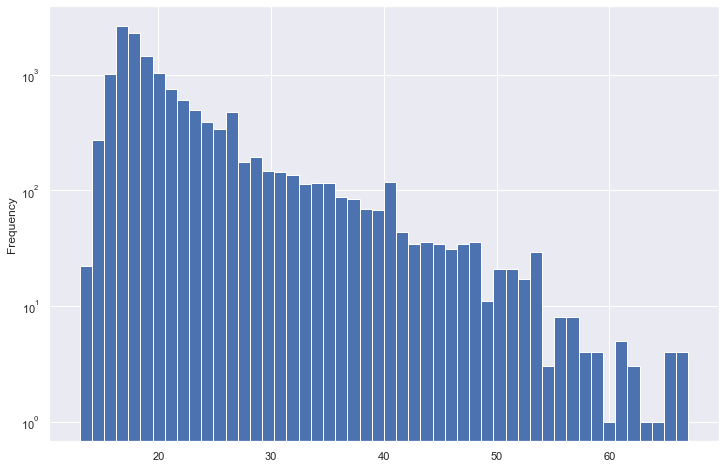

TP_COR_RACA


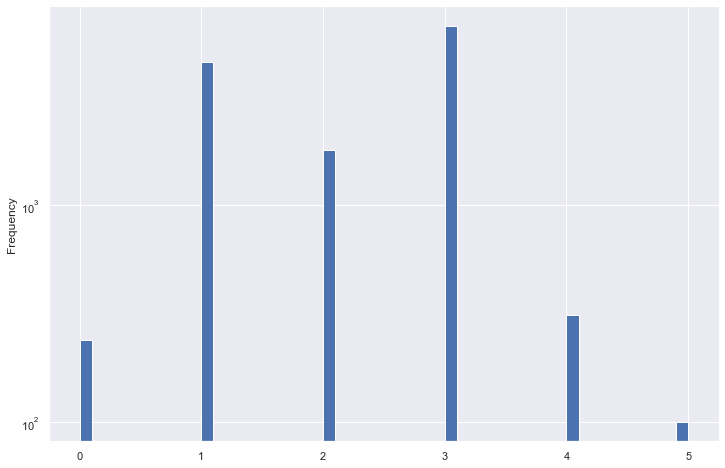

TP_ST_CONCLUSAO


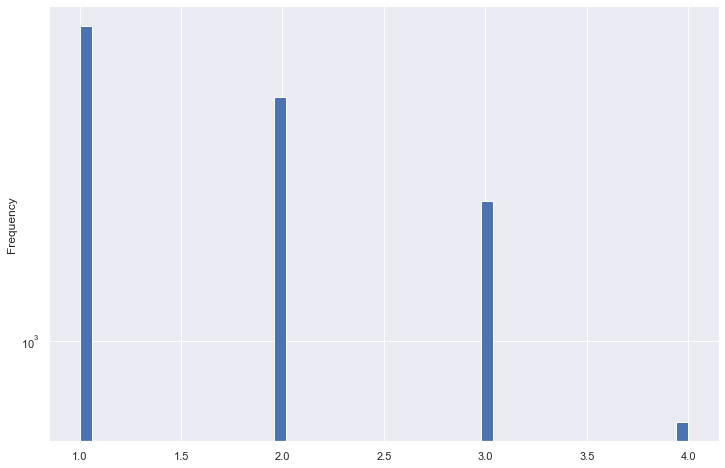

TP_ANO_CONCLUIU


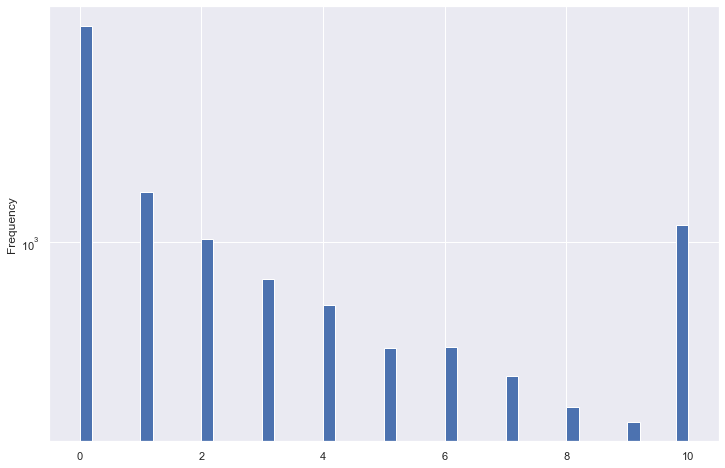

TP_ESCOLA


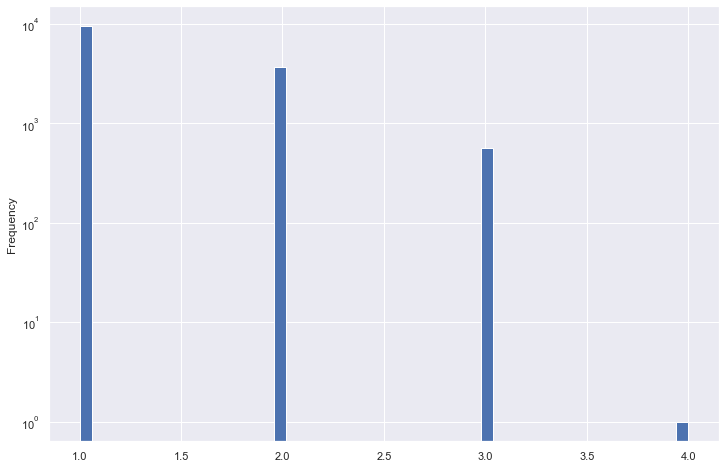

NU_NOTA_CN


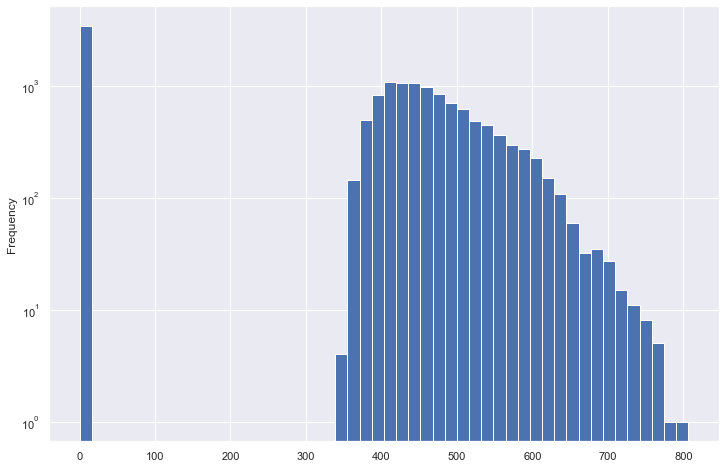

NU_NOTA_CH


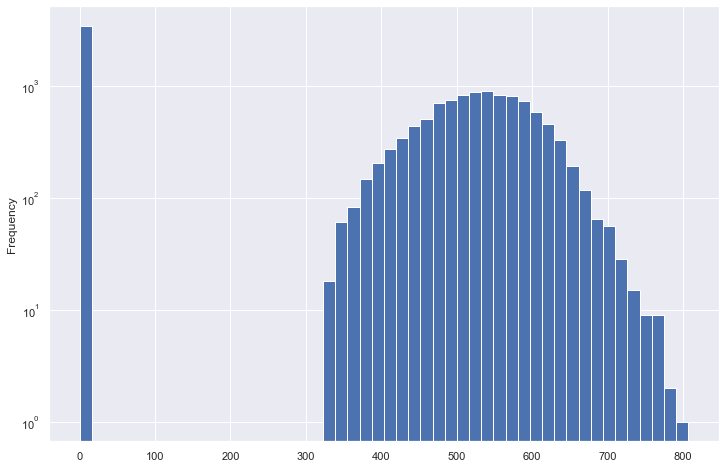

NU_NOTA_LC


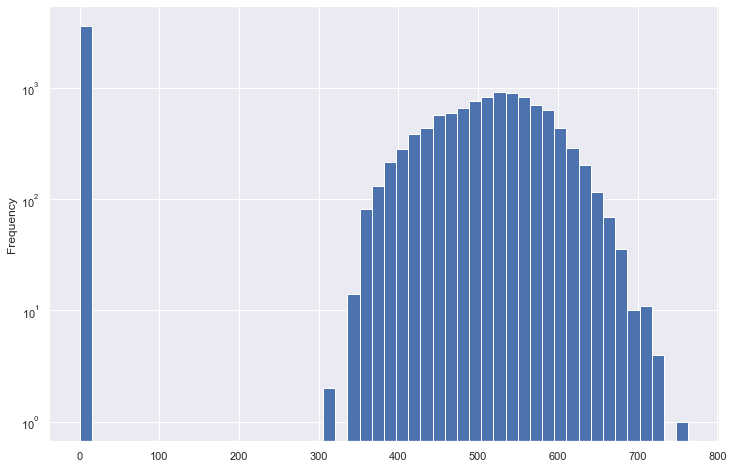

NU_NOTA_MT


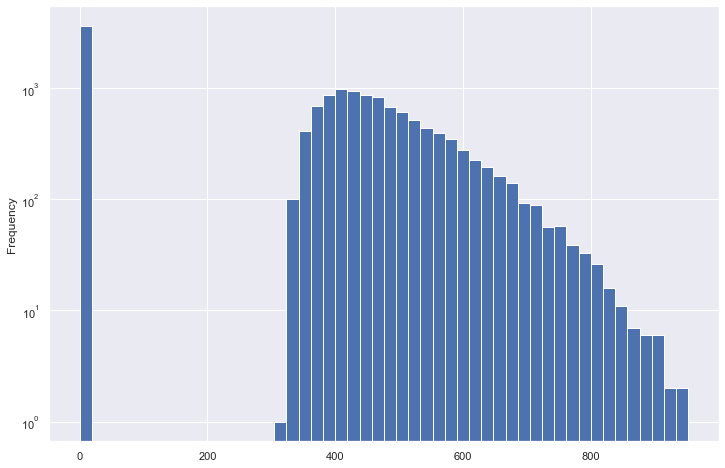

TP_LINGUA


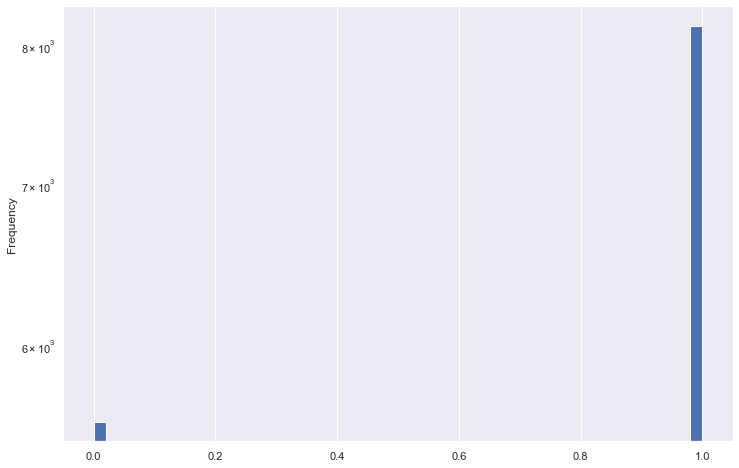

NU_NOTA_COMP1


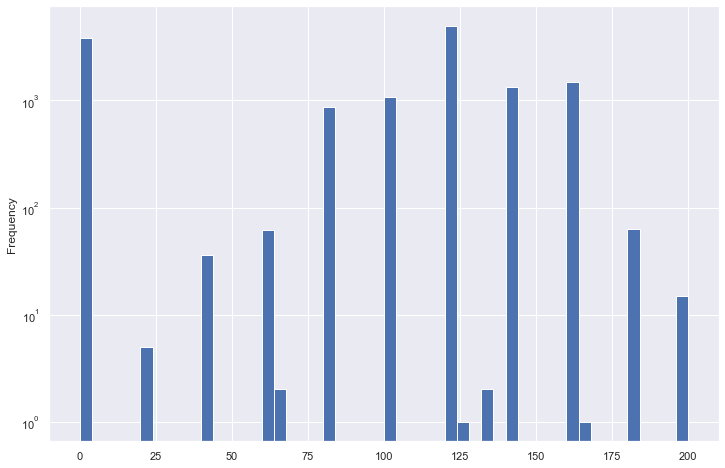

NU_NOTA_COMP2


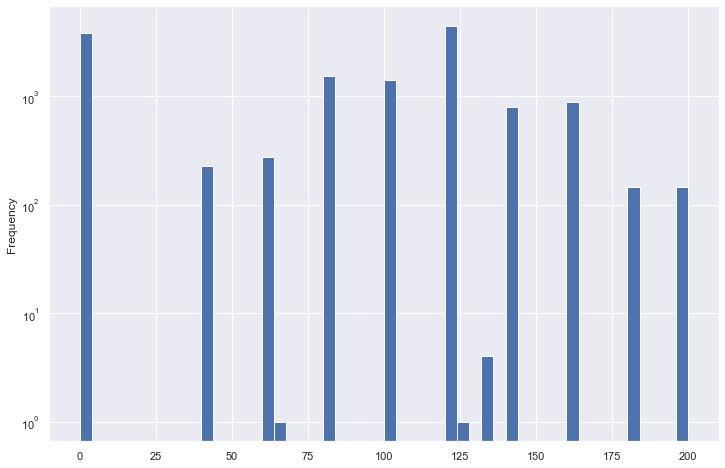

NU_NOTA_COMP3


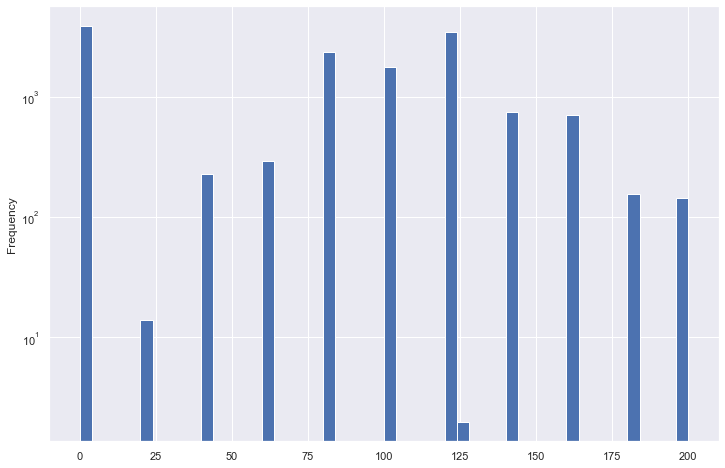

NU_NOTA_COMP4


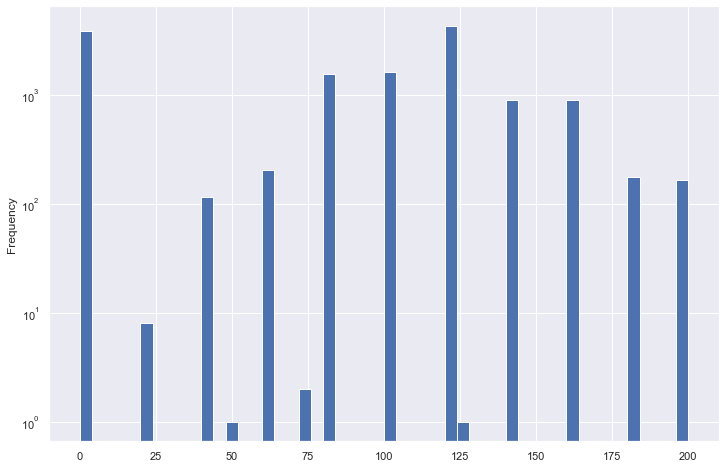

NU_NOTA_COMP5


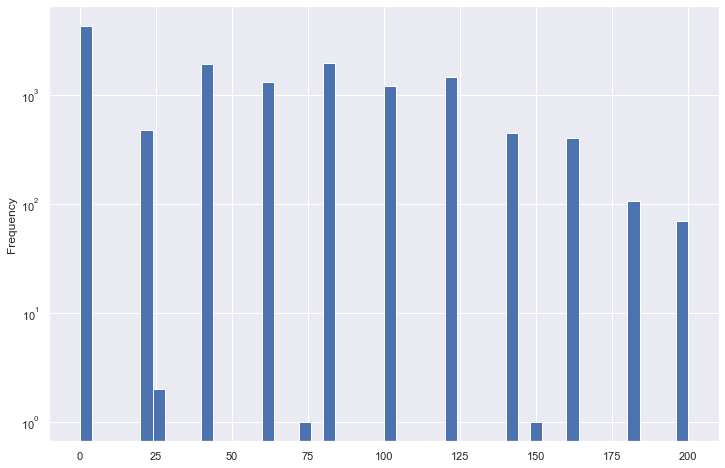

NU_NOTA_REDACAO


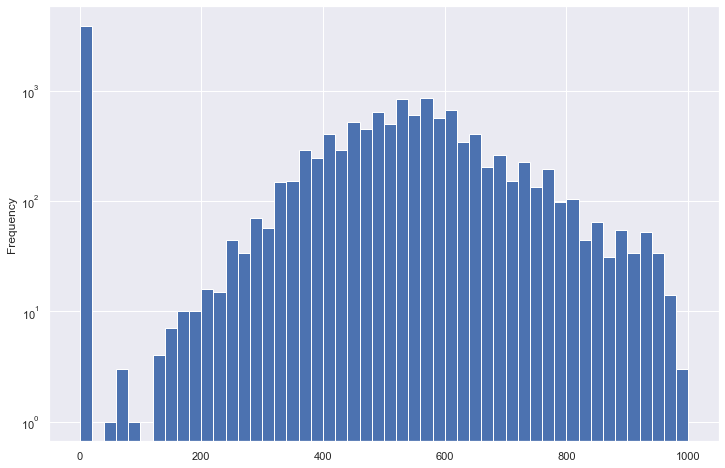

TP_SEXO_F


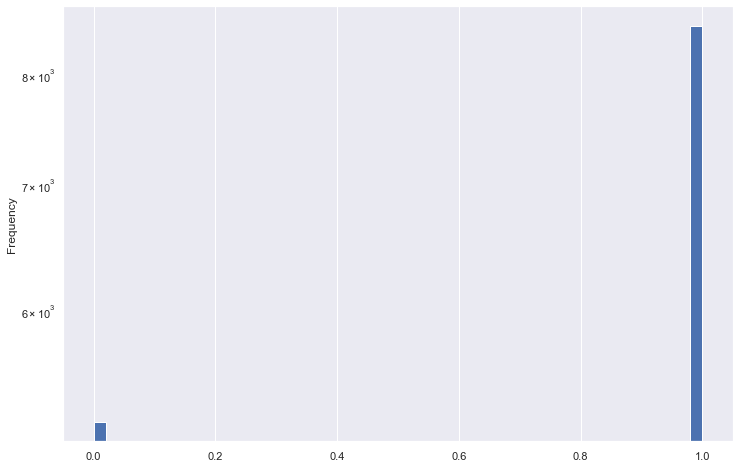

TP_SEXO_M


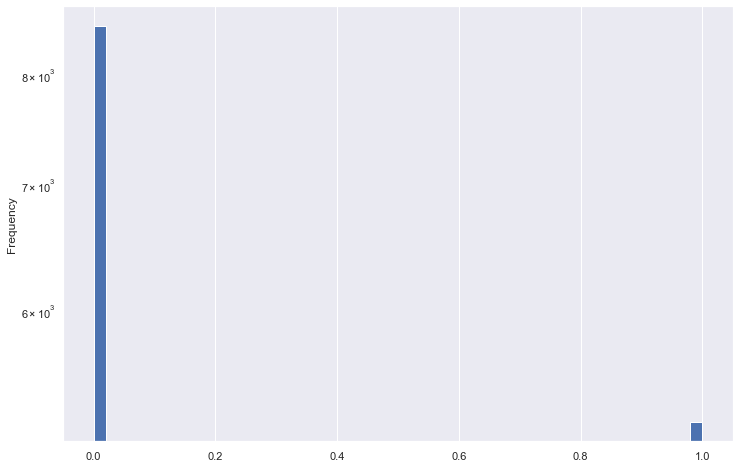

Q001_A


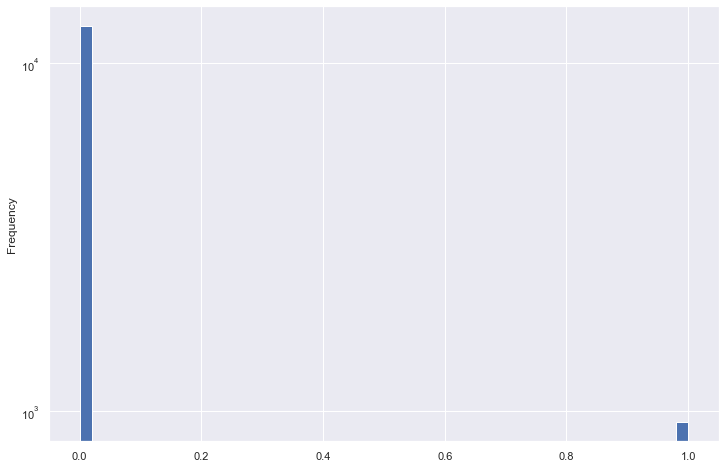

Q001_B


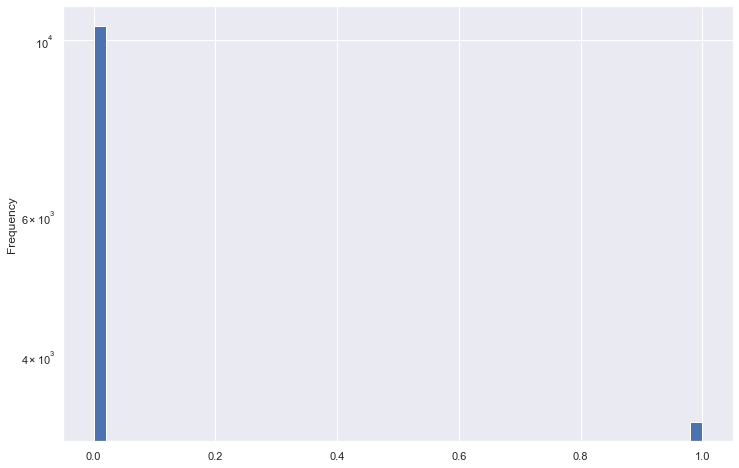

Q001_C


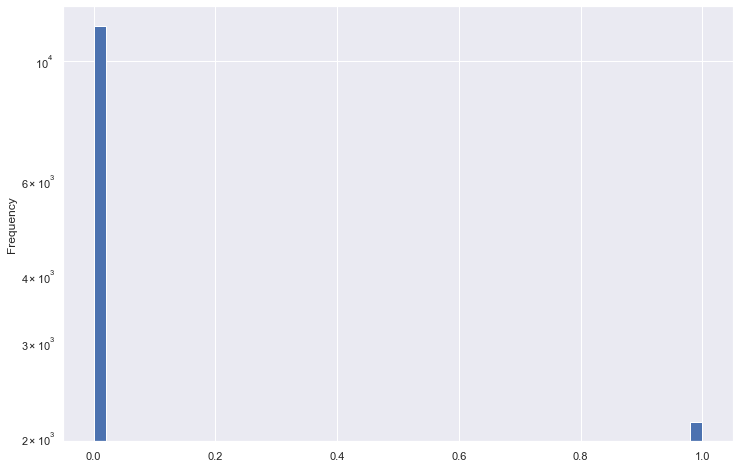

Q001_D


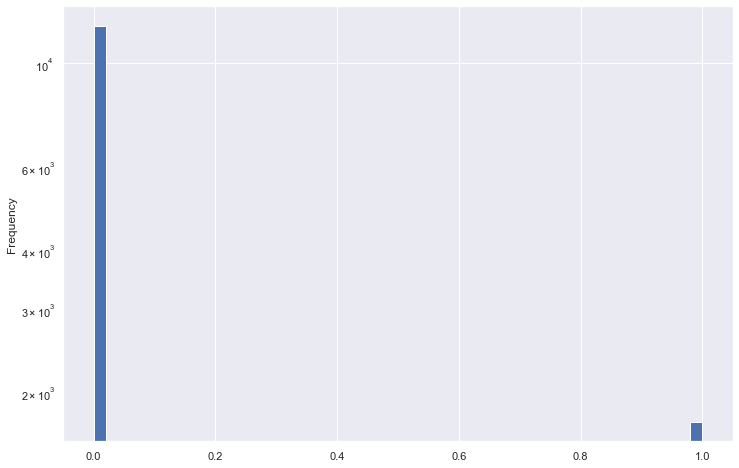

Q001_E


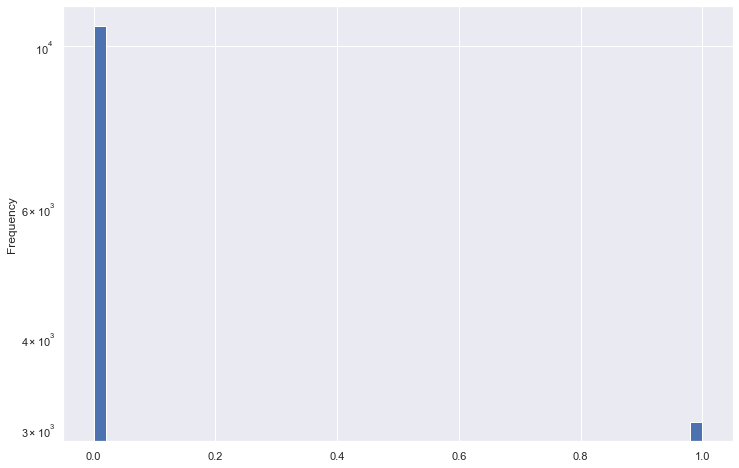

Q001_F


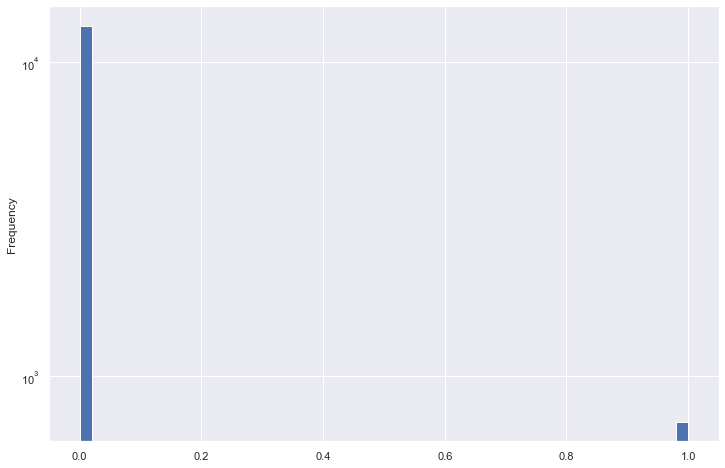

Q001_G


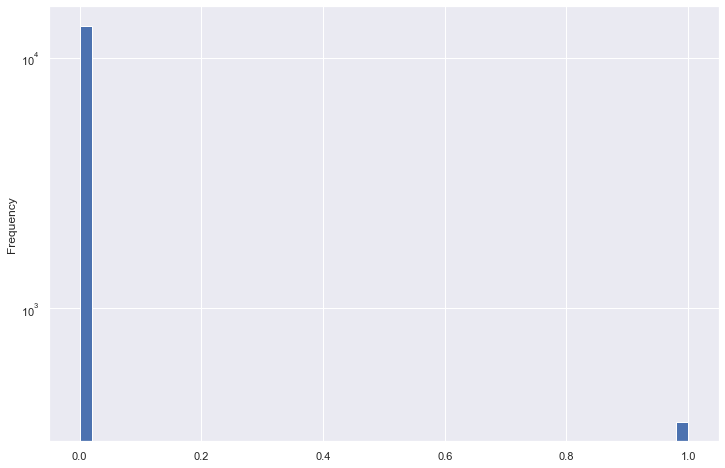

Q001_H


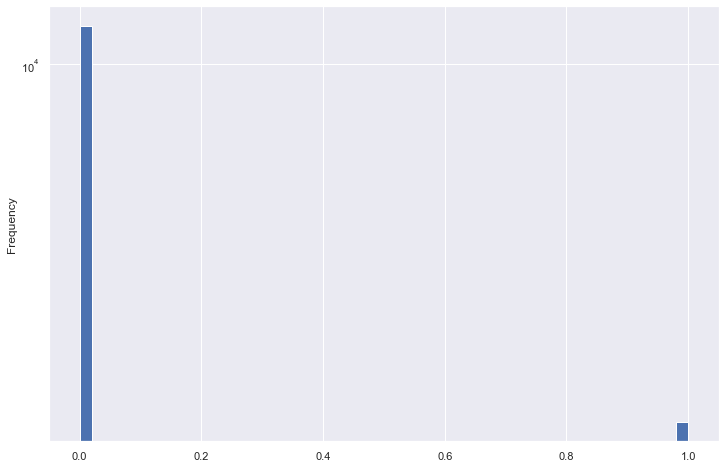

Q002_A


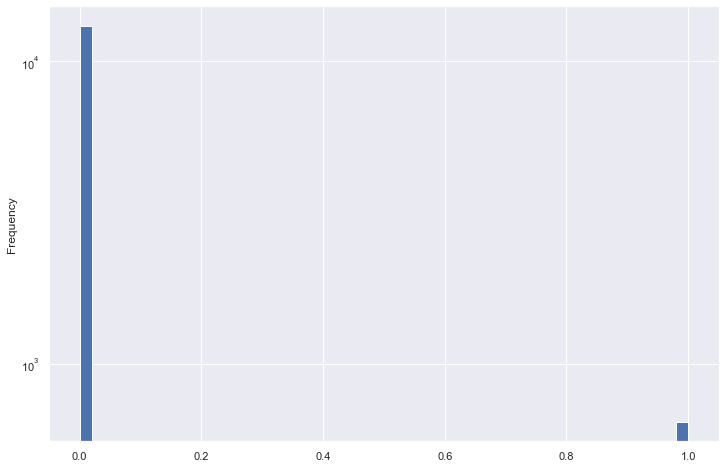

Q002_B


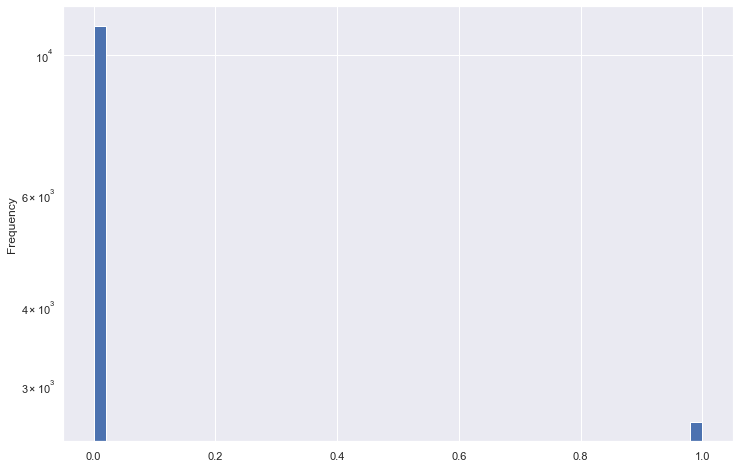

Q002_C


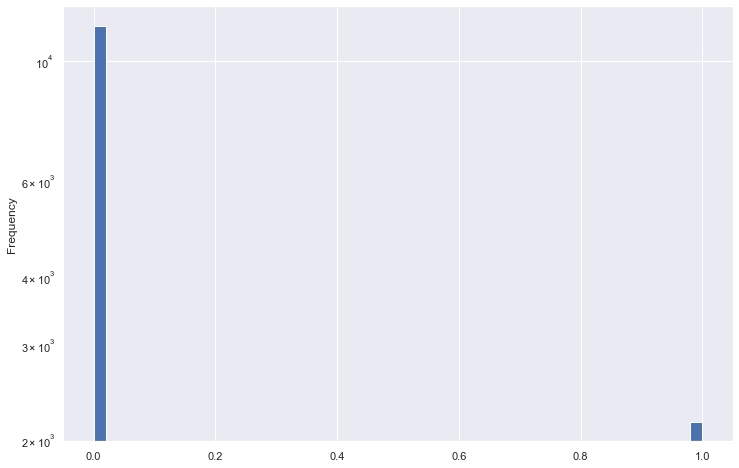

Q002_D


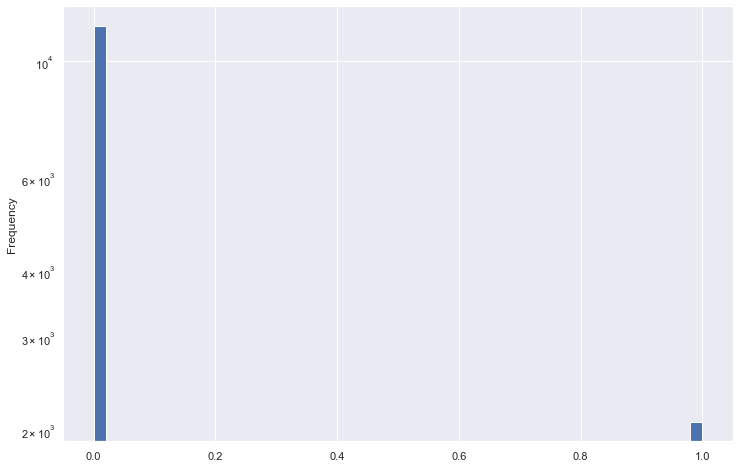

Q002_E


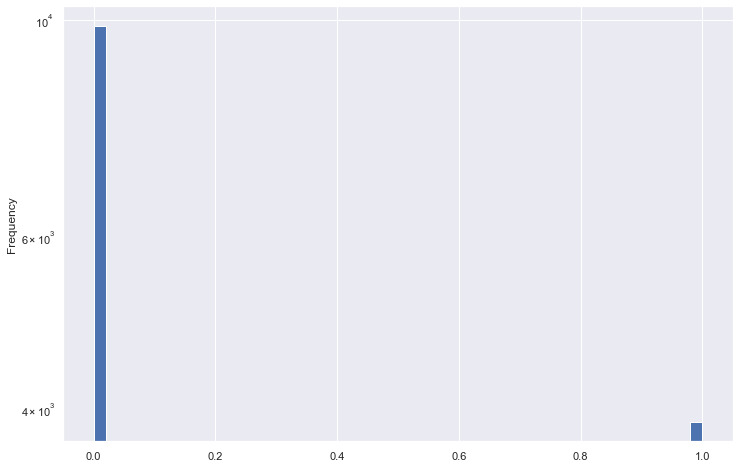

Q002_F


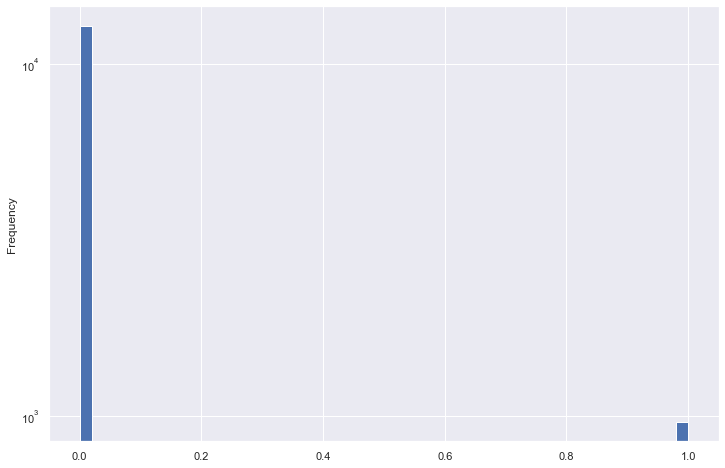

Q002_G


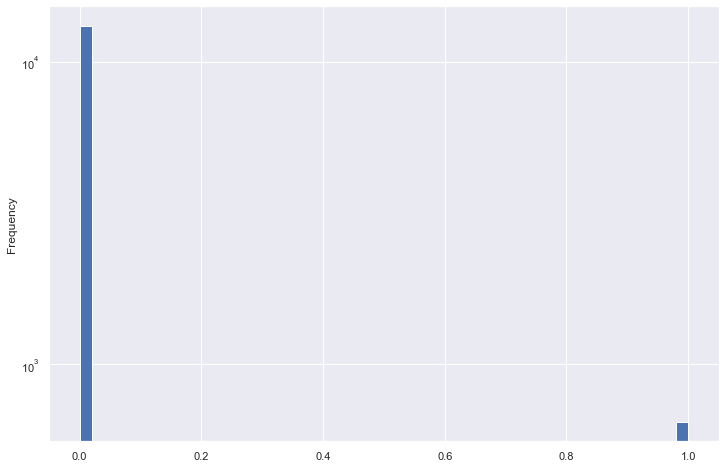

Q002_H


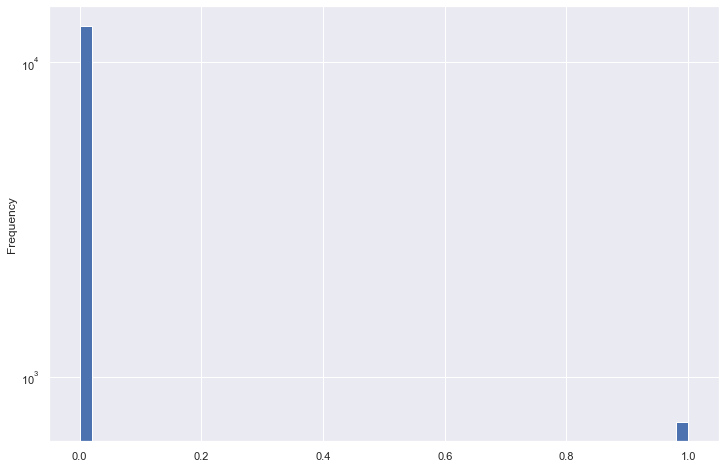

Q006_A


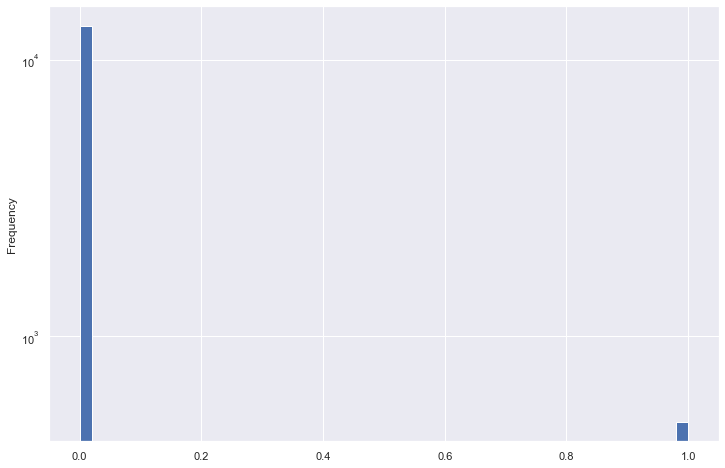

Q006_B


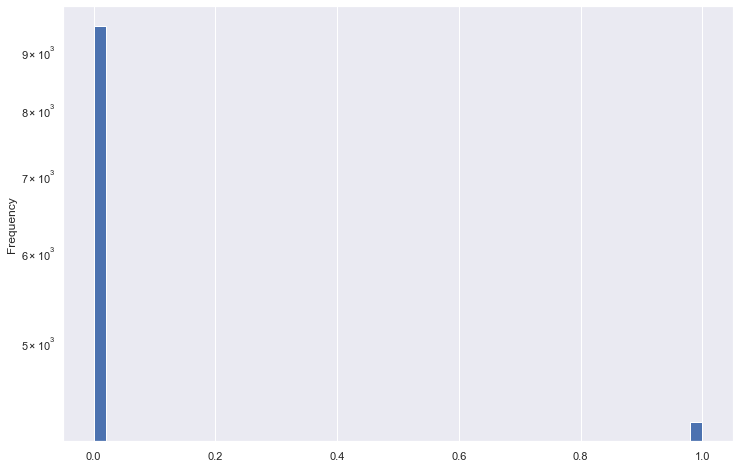

Q006_C


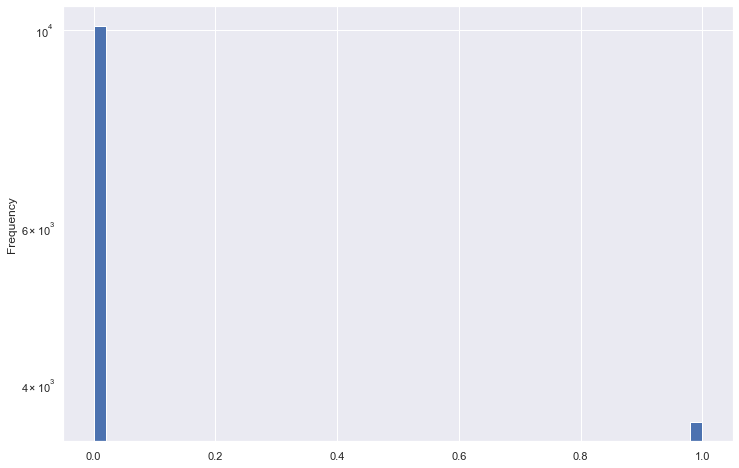

Q006_D


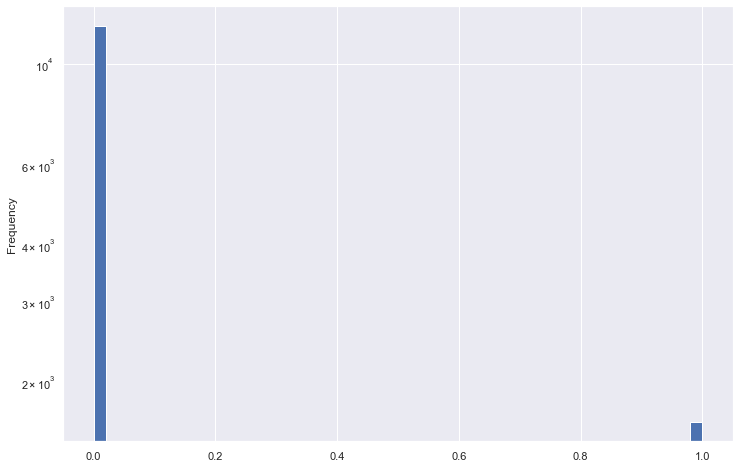

Q006_E


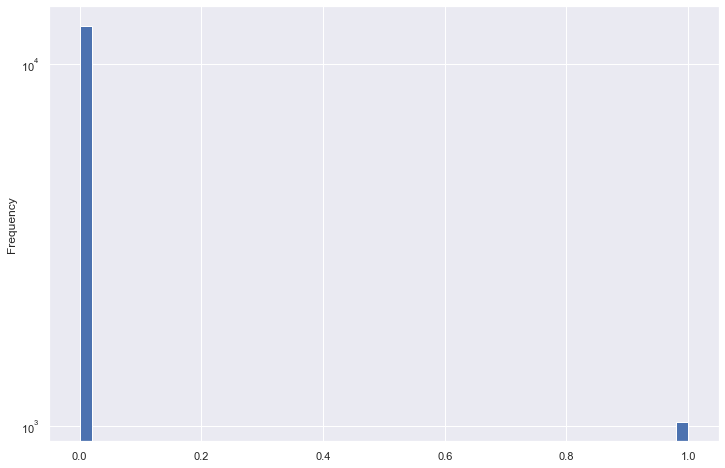

Q006_F


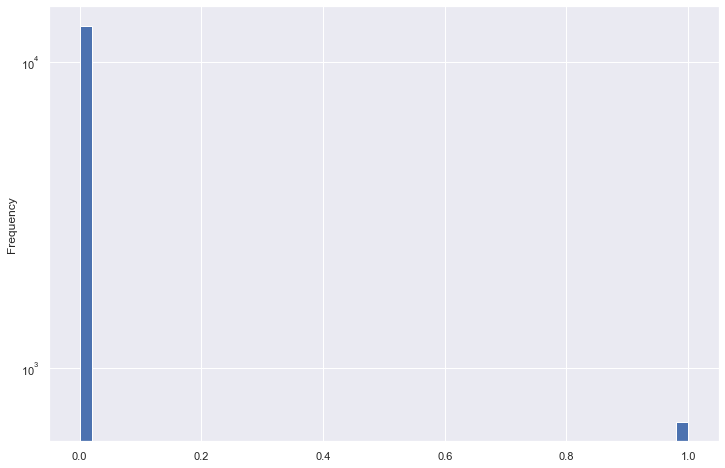

Q006_G


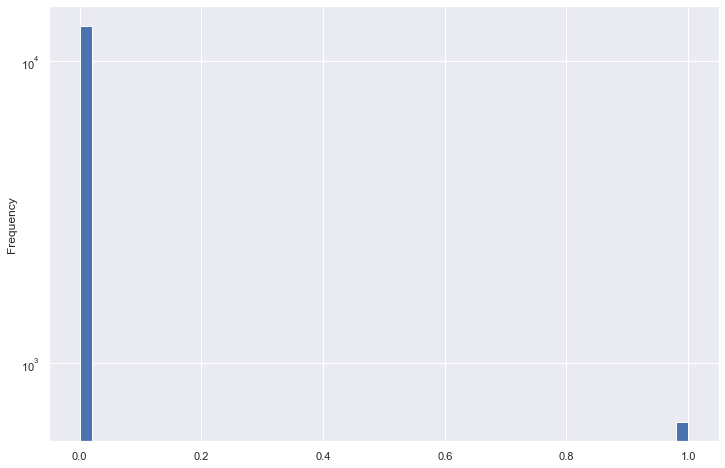

Q006_H


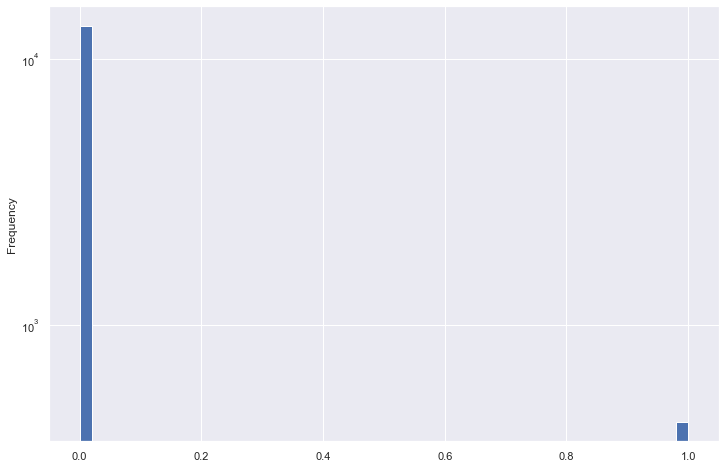

Q006_I


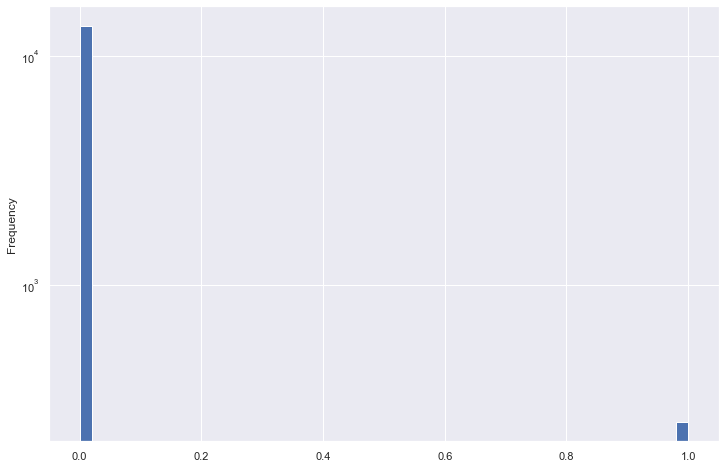

Q006_J


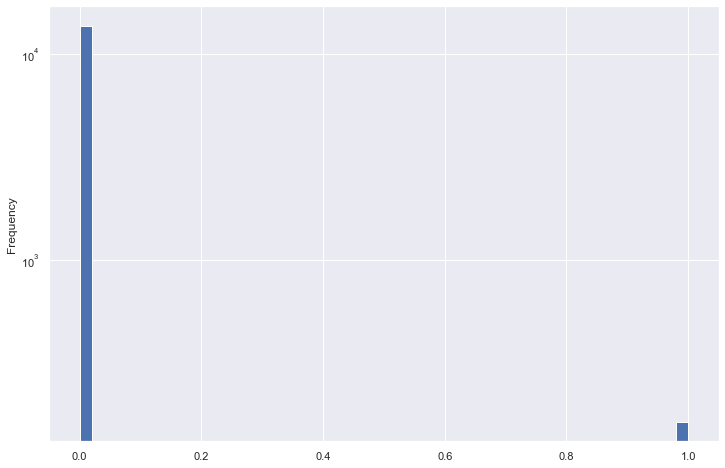

Q006_K


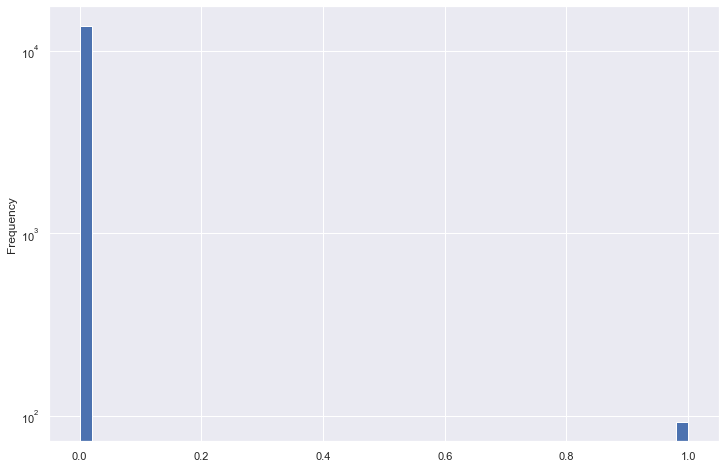

Q006_L


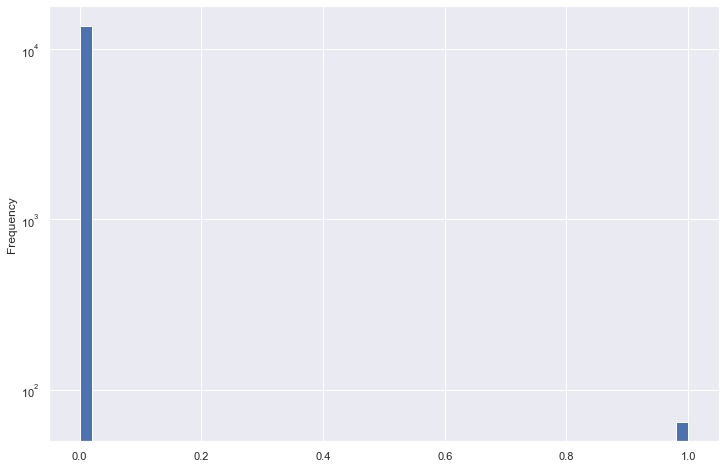

Q006_M


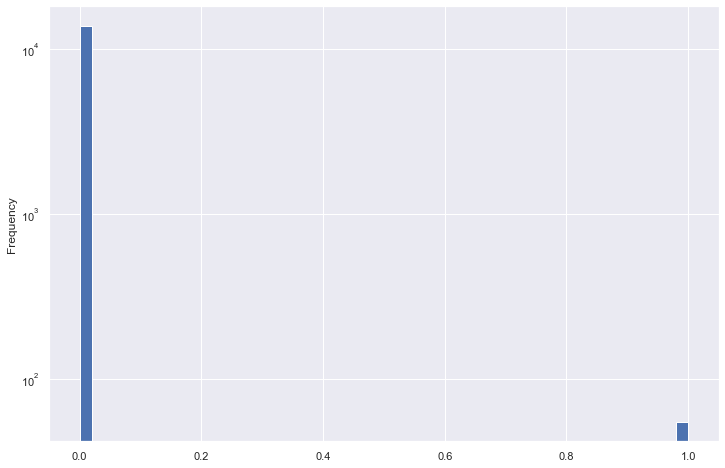

Q006_N


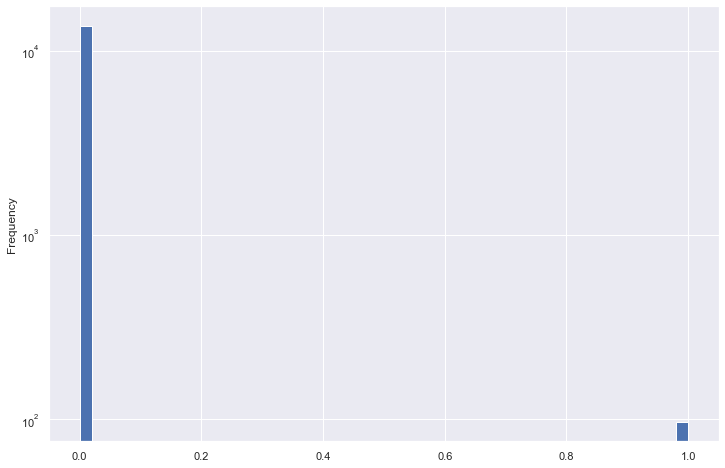

Q006_O


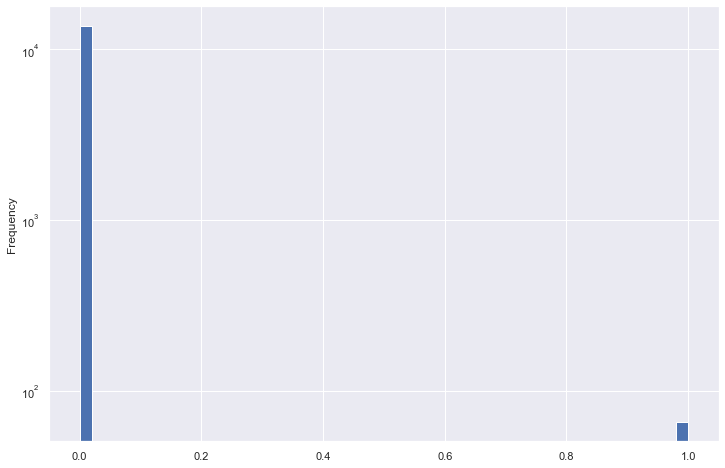

Q006_P


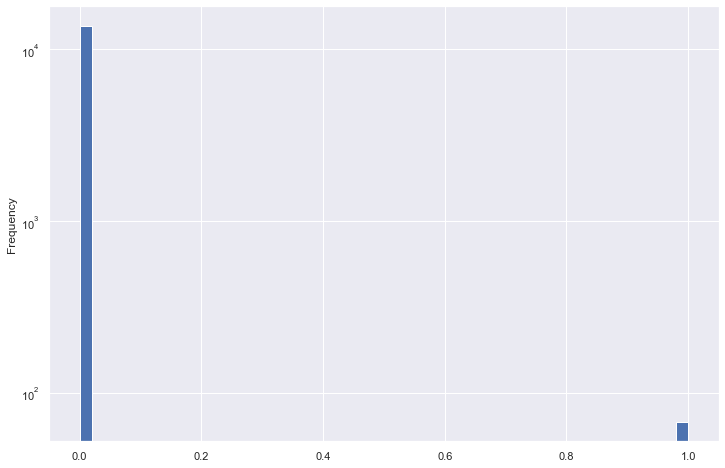

Q006_Q


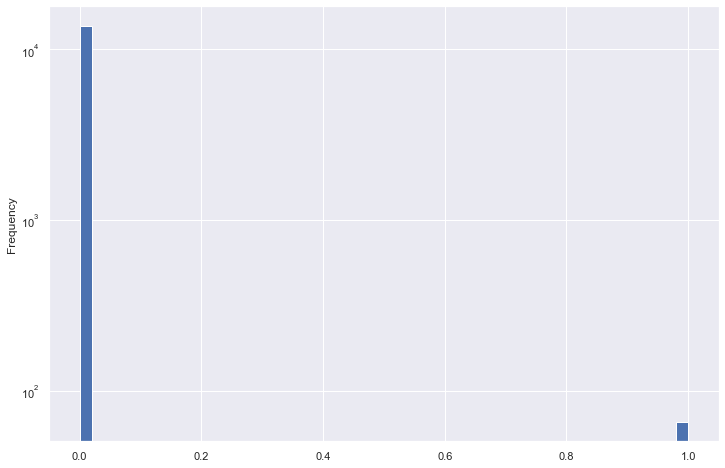

Q024_A


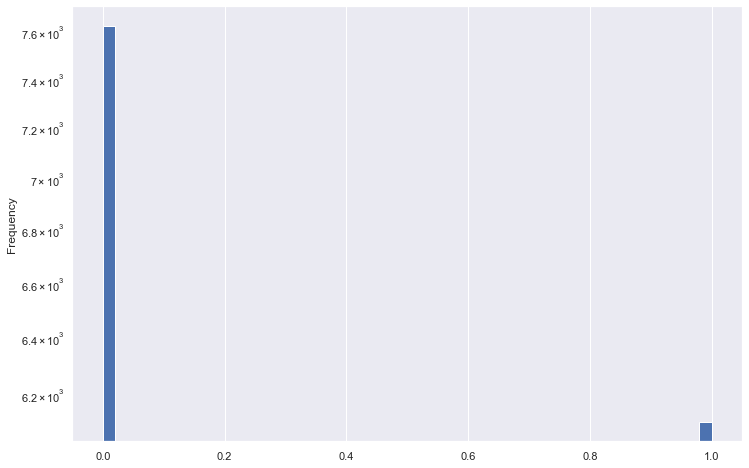

Q024_B


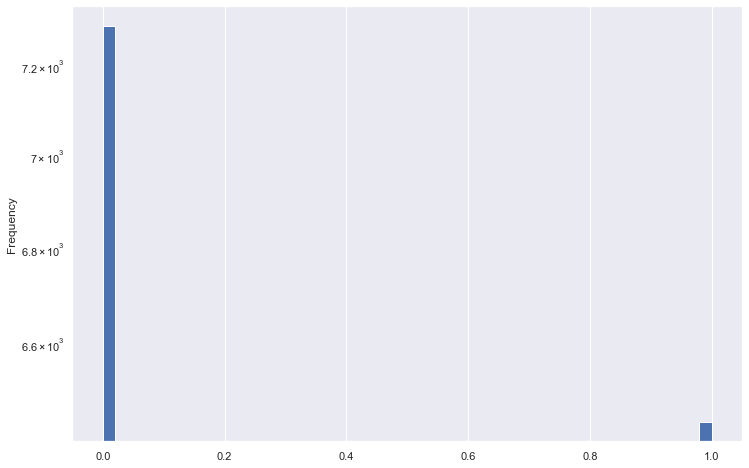

Q024_C


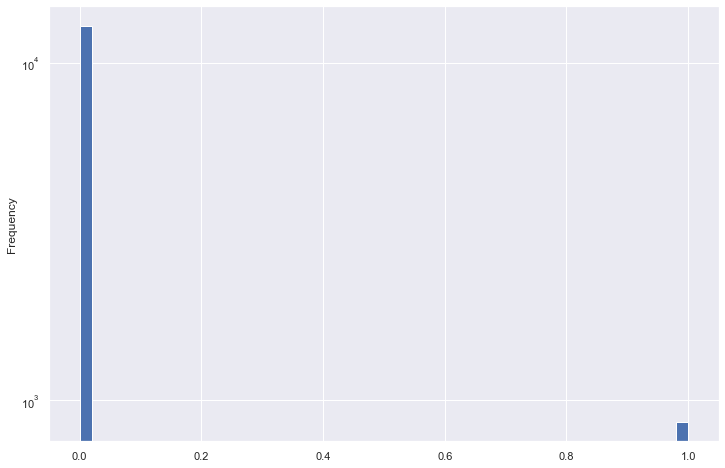

Q024_D


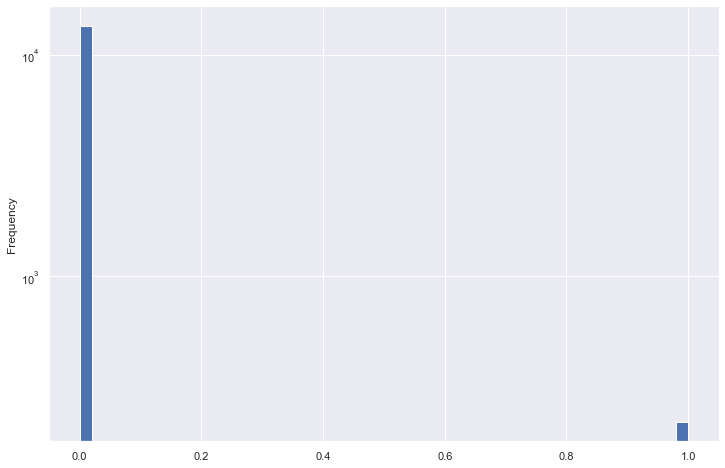

Q024_E


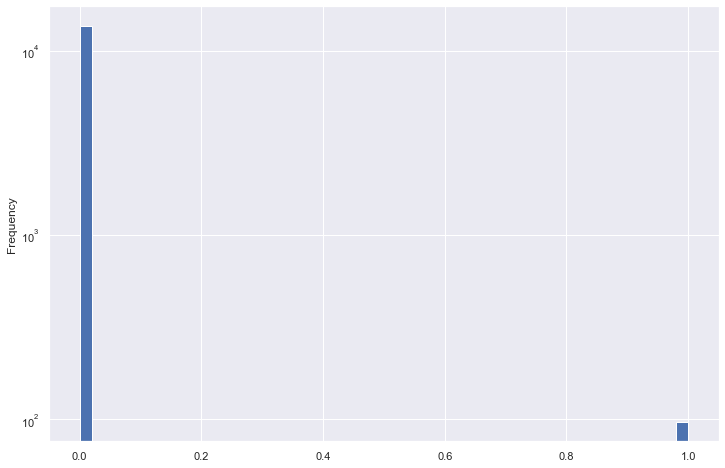

Q025_A


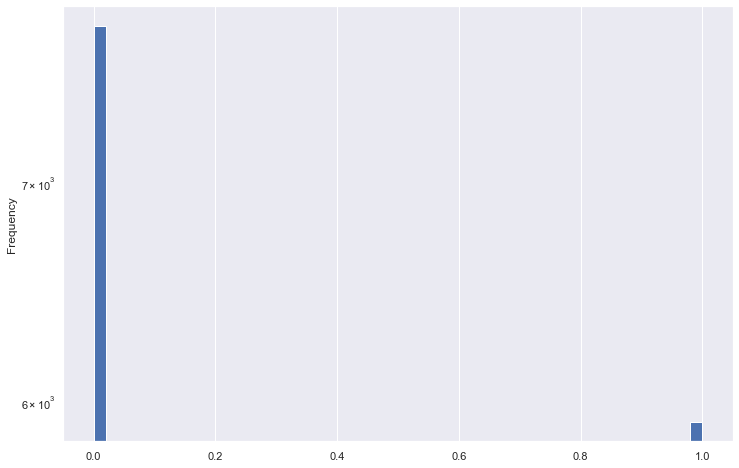

Q025_B


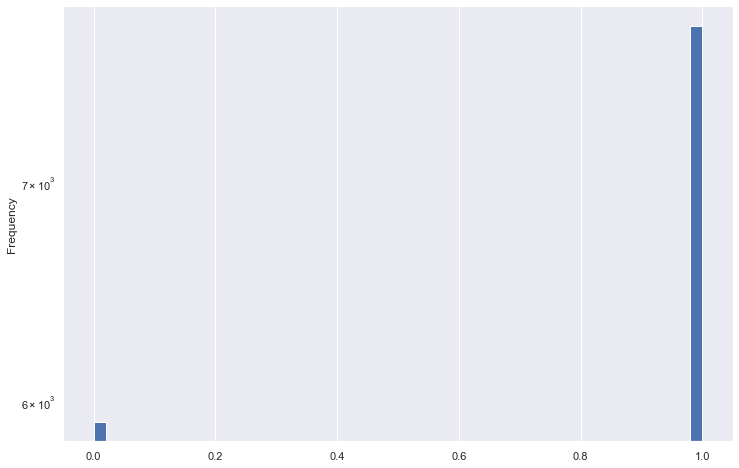

Q026_A


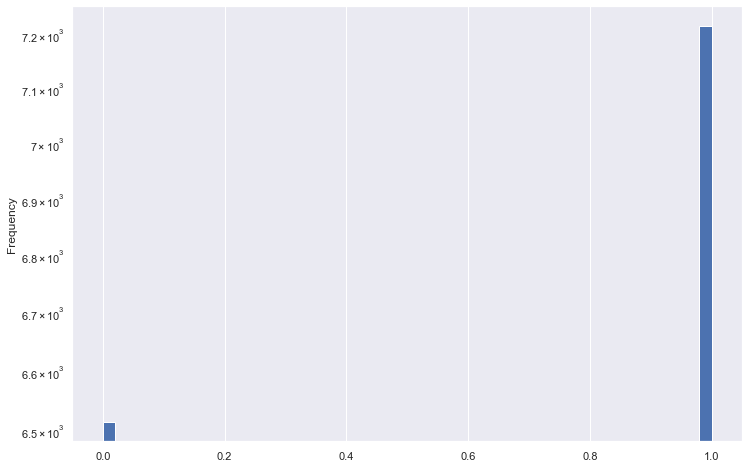

Q026_B


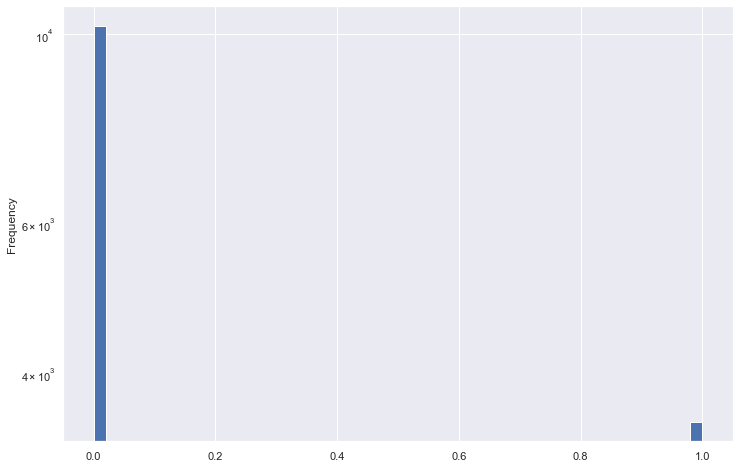

Q026_C


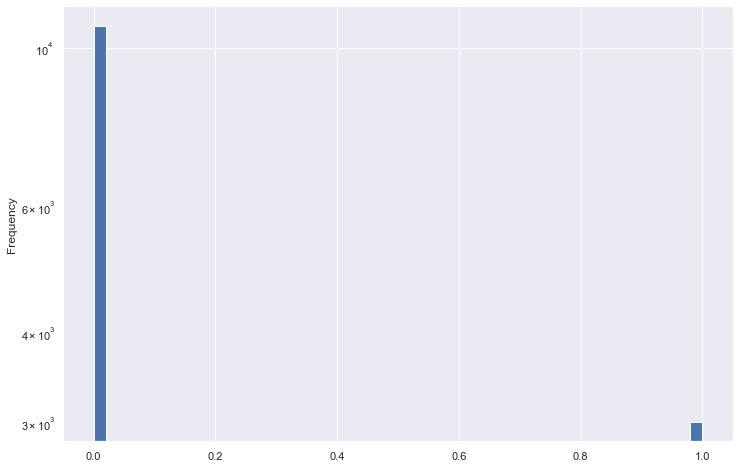

Q047_A


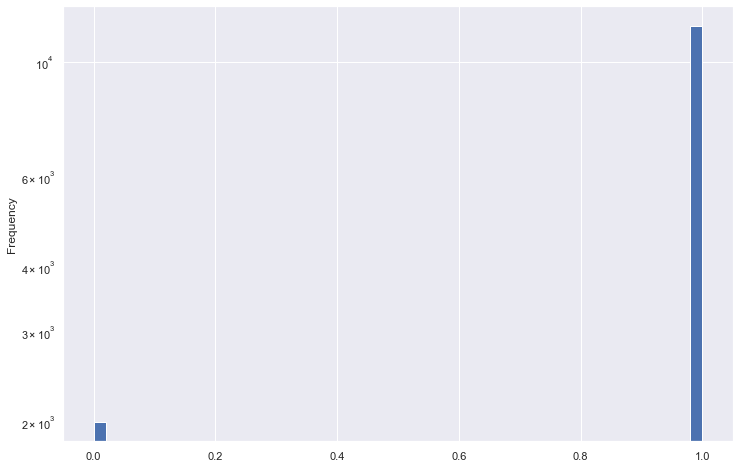

Q047_B


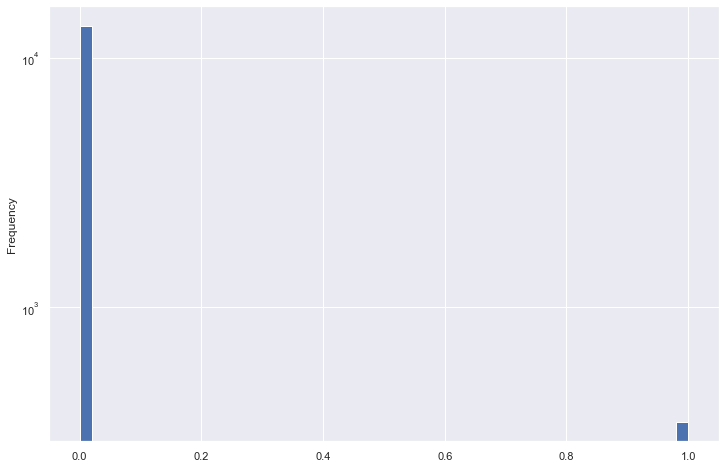

Q047_C


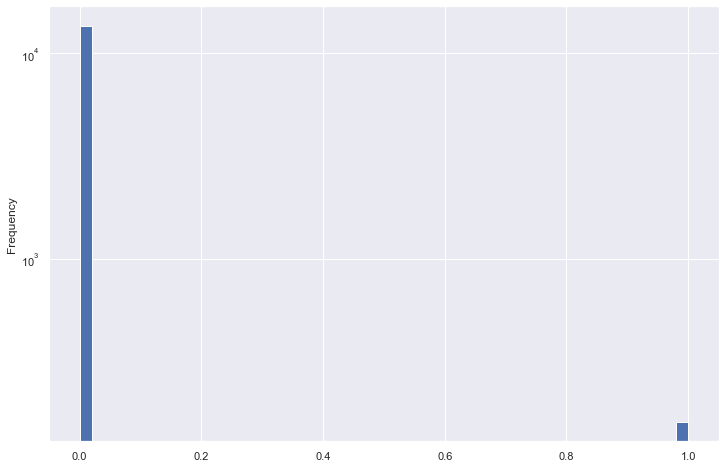

Q047_D


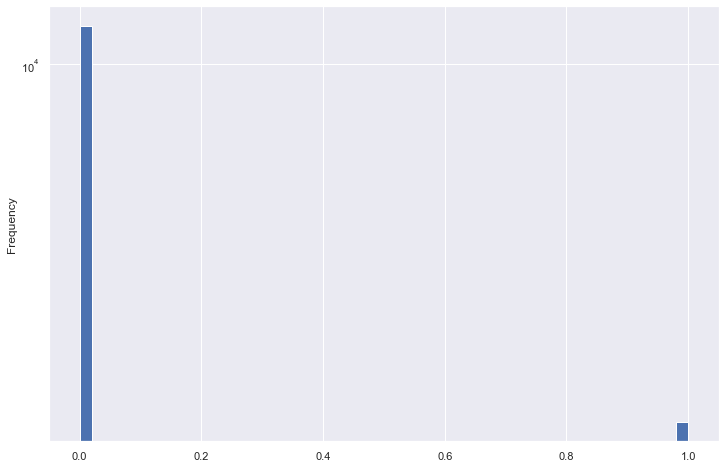

Q047_E


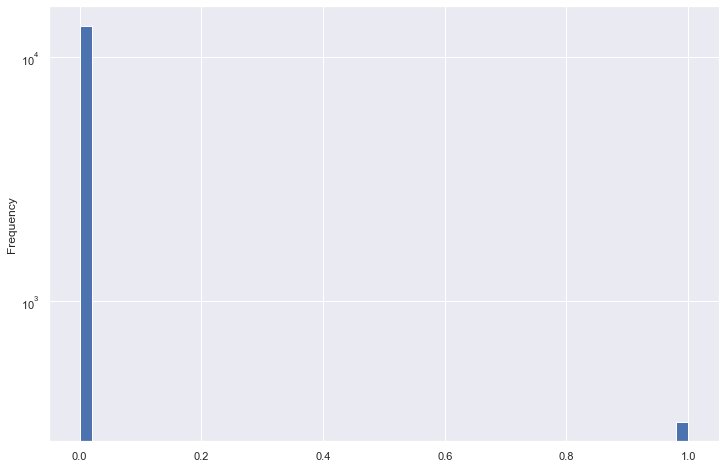

In [15]:
# Análise dos histogramas de cada variável (coluna)
for coluna in data_train.columns:
    print(coluna)
    data_train[coluna].plot.hist(bins = 50, log= True)
    plt.show()

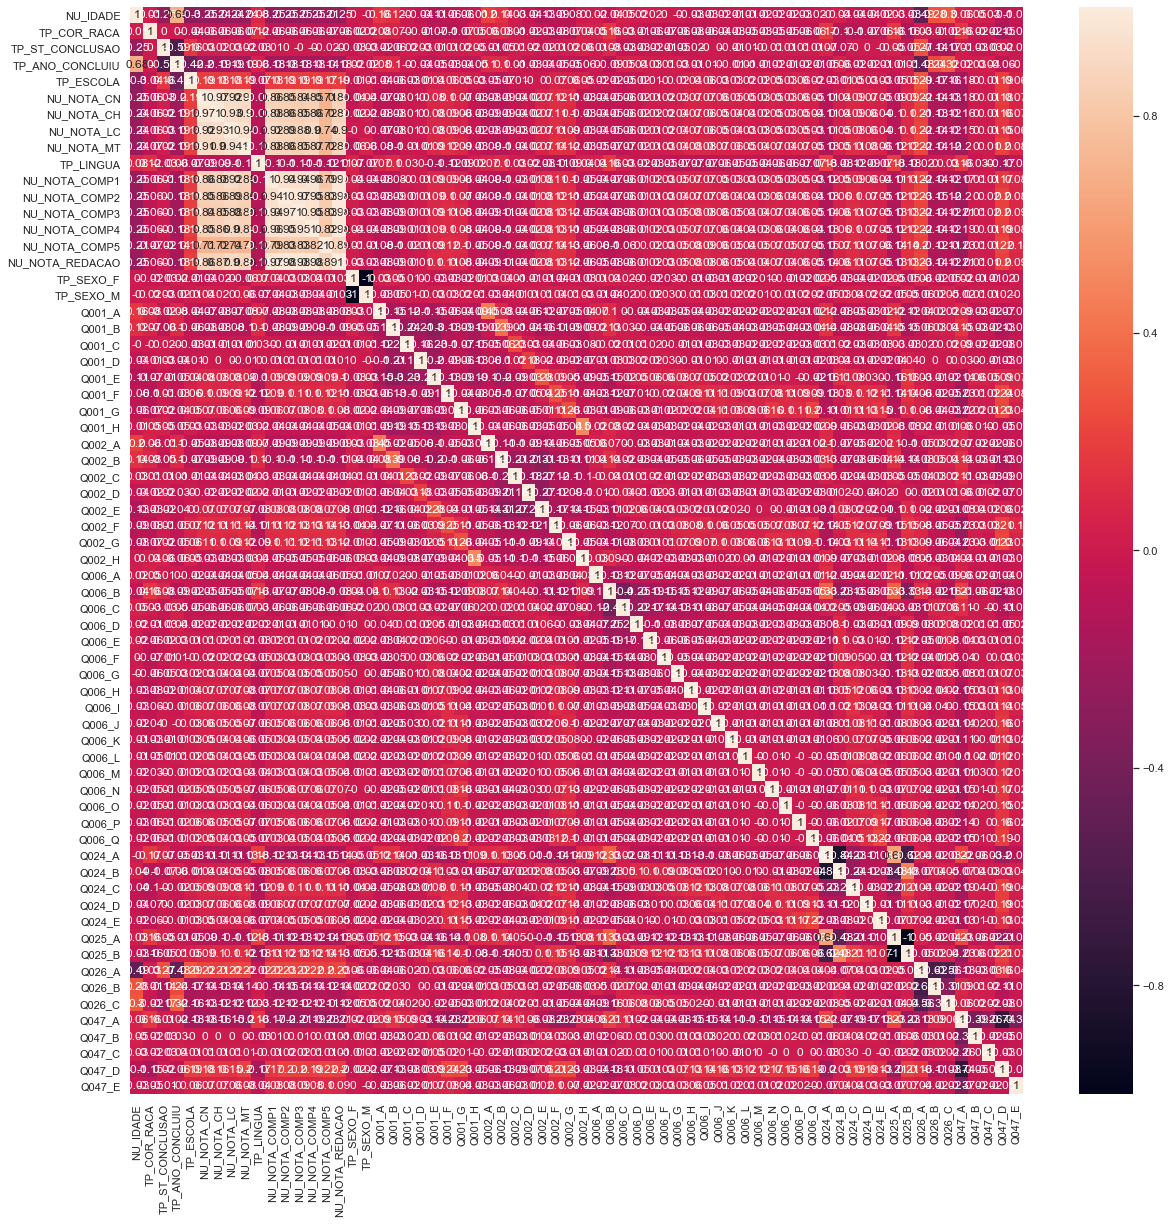

In [16]:
#Analisando a correlação entre as varáaveis numéricas
plt.figure(figsize = (20,20))
sns.heatmap(data_train[data_train.columns].corr().round(2), annot= True)

In [17]:
# Series com o valor absoluto dos valores de correlação para a Coluna Nota de Mat
NU_NOTA_MT_CORRELATION = abs(data_train[data_train.columns].corr().round(3)['NU_NOTA_MT']) 

In [18]:
# Lista com as colunas correlacionadas: Valor absoluto do Coeficiente de correlação maior que 0.2
colunas_corr = list(NU_NOTA_MT_CORRELATION.where(NU_NOTA_MT_CORRELATION>=0.2).dropna().index)

In [19]:
# Selecionando apenas as variáveis correlacionadas
data_train = data_train[colunas_corr ]
data_test = data_test[colunas_corr]

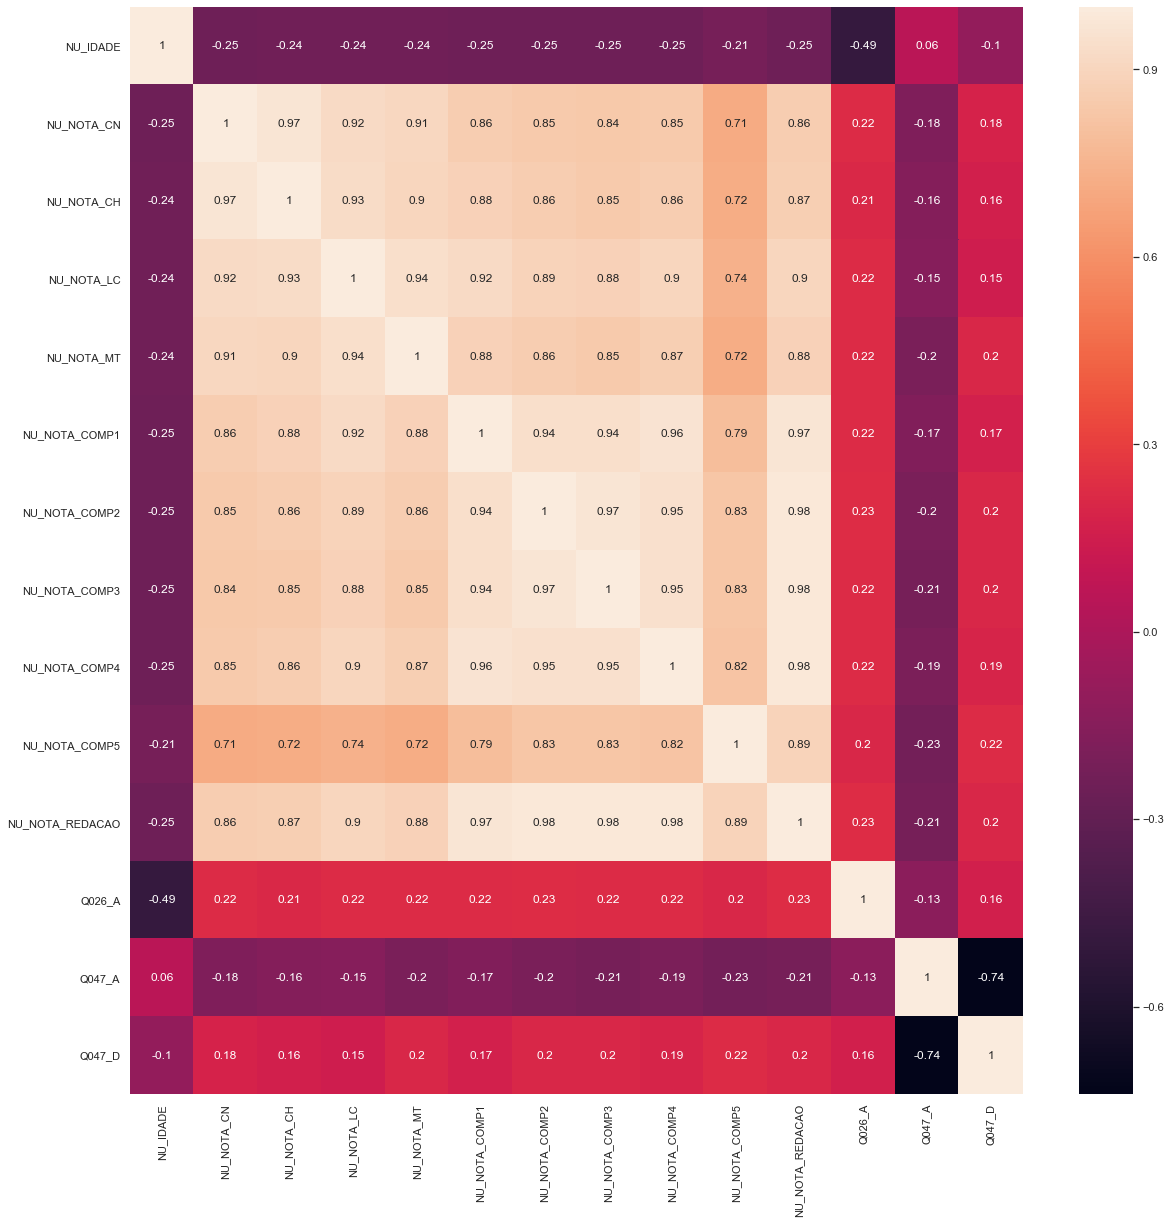

In [20]:
# Nova matriz de correlação
plt.figure(figsize = (20,20))
sns.heatmap(data_train[data_train.columns].corr().round(2), annot= True)

In [21]:
# Separando as variáveis independentes e dependentes 
Y_train = data_train['NU_NOTA_MT']
X_train = data_train.drop('NU_NOTA_MT', axis=1)

Y_test = data_test['NU_NOTA_MT']
X_test = data_test.drop('NU_NOTA_MT', axis=1)

# Tentativa com Linear Regression 

In [22]:
# Definindo a Regressão Linear
reg= LinearRegression()

In [23]:
# Realizando o Fit
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Realizando a predição
Y_pred = reg.predict(X_test)

In [25]:
# Corrigindo notas negativas, substituindo por 0
Y_pred = [x if x>=0 else 0 for x in Y_pred]

In [26]:
# Salvando os resultados no arquivo answer.csv
answer['NU_NOTA_MT'] = Y_pred
answer.to_csv('answer.csv', encoding='utf-8', index=False) 

# Tentativa com PCA

In [27]:
# Defininindo o PCA
pca = PCA(0.95)

In [28]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca.explained_variance_ratio_

array([0.92411976, 0.04911759])

In [30]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [31]:
reg.fit(X_train_pca, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
Y_pred_pca = reg.predict(X_test_pca)

In [33]:
# Corrigindo notas negativas, substituindo por 0
Y_pred_pca = [x if x>=0 else 0 for x in Y_pred_pca]

In [34]:
# Salvando os resultados no arquivo answer.csv
#answer['NU_NOTA_MT'] = Y_pred_pca
#answer.to_csv('answer.csv', encoding='utf-8', index=False) 

__Nota com PCA ficou pior que Linear Regression__

# Tentativa com RIDGE Regression

In [35]:
# Definindo o StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [36]:
ridge_regression = Ridge(alpha=1, solver="cholesky")

ridge_regression.fit(X_train_scaled , Y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [37]:
# Realizando a predição
Y_pred_RIDGE = ridge_regression.predict(X_test_scaled)

In [38]:
# Corrigindo notas negativas, substituindo por 0
Y_pred_RIDGE = [x if x>=0 else 0 for x in Y_pred_RIDGE]

In [39]:
# Salvando os resultados no arquivo answer.csv 
#answer['NU_NOTA_MT'] = Y_pred_RIDGE
#answer.to_csv('answer.csv', encoding='utf-8', index=False) 

__Nota com RIDGE ficou pior que Linear Regression__

# Tentativa com LASSO Regression

In [40]:
lasso_regression = Lasso(alpha=0.5)

lasso_regression.fit(X_train_scaled , Y_train)

lasso_regression.intercept_, lasso_regression.coef_

(356.09260742898766,
 array([ -0.97454169,  55.30014496,  -6.2685851 , 152.80475588,
          4.30573607,   2.12699579,   0.        ,   4.03825591,
          1.50307456,   5.7587461 ,  -0.36143498,  -4.67887941,
          6.32509236]))

In [41]:
# Realizando a predição
Y_pred_LASSO = lasso_regression.predict(X_test_scaled)

In [42]:
# Corrigindo notas negativas, substituindo por 0
Y_pred_LASSO = [x if x>=0 else 0 for x in Y_pred_LASSO]

In [43]:
# Salvando os resultados no arquivo answer.csv 
#answer['NU_NOTA_MT'] = Y_pred_LASSO
#answer.to_csv('answer.csv', encoding='utf-8', index=False) 

__Nota com LASSO ficou pior que Linear Regression__